In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df= pd.read_csv("crudeprice.csv")

In [4]:
df

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9339,2023-03-07,83.03
9340,2023-03-08,82.1
9341,2023-03-09,81.0
9342,2023-03-10,82.3


In [5]:
df.columns = ["Date","Price"]

In [6]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9339,2023-03-07,83.03
9340,2023-03-08,82.1
9341,2023-03-09,81.0
9342,2023-03-10,82.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9344 entries, 0 to 9343
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    9344 non-null   object
 1   Price   9344 non-null   object
dtypes: object(2)
memory usage: 146.1+ KB


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9339,2023-03-07,83.03
9340,2023-03-08,82.1
9341,2023-03-09,81.0
9342,2023-03-10,82.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9344 entries, 0 to 9343
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9344 non-null   datetime64[ns]
 1   Price   9344 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 146.1+ KB


In [11]:
df["Price"].value_counts()

.        253
18.48     26
18.15     22
16.85     20
18.00     18
        ... 
18.59      1
40.62      1
71.31      1
58.70      1
53.25      1
Name: Price, Length: 5128, dtype: int64

In [12]:
df = df[df["Price"]!="."]

In [13]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9339,2023-03-07,83.03
9340,2023-03-08,82.1
9341,2023-03-09,81.0
9342,2023-03-10,82.3


In [14]:
df.index = df["Date"]

In [15]:
df = df.drop("Date",axis=1)

In [16]:
df["Price"] = df["Price"].apply(lambda x: float(x))

In [17]:
df 

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2023-03-07,83.03
2023-03-08,82.10
2023-03-09,81.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9091 entries, 1987-05-20 to 2023-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9091 non-null   float64
dtypes: float64(1)
memory usage: 142.0 KB


<AxesSubplot:xlabel='Date'>

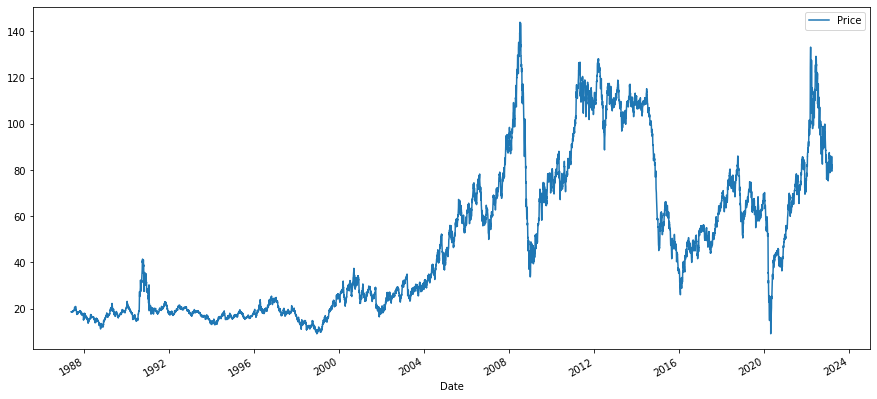

In [19]:
df.plot(figsize=(15,7))

In [20]:
df1 = df.reset_index()['Price']

In [21]:
df1 

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
        ...  
9086    83.03
9087    82.10
9088    81.00
9089    82.30
9090    79.67
Name: Price, Length: 9091, dtype: float64

In [22]:
np.array(df1).reshape(-1,1).shape

(9091, 1)

In [69]:
# scaling data

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

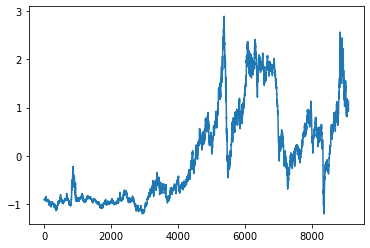

In [70]:
plt.plot(df1)

In [25]:
df2 = pd.DataFrame(np.random.randint(0,100,(7,7)))

In [26]:
df2 

,0,1,2,3,4,5,6
0,31,67,60,4,74,34,62
1,23,50,21,13,29,14,12
2,67,9,61,89,7,94,92
3,13,41,53,1,76,11,43
4,63,70,19,2,39,74,22
5,48,81,52,83,32,90,34
6,7,55,62,47,48,50,86


In [27]:
scaler.fit_transform(df2)

array([[0.4       , 0.80555556, 0.95348837, 0.03409091, 0.97101449,
        0.27710843, 0.625     ],
       [0.26666667, 0.56944444, 0.04651163, 0.13636364, 0.31884058,
        0.03614458, 0.        ],
       [1.        , 0.        , 0.97674419, 1.        , 0.        ,
        1.        , 1.        ],
       [0.1       , 0.44444444, 0.79069767, 0.        , 1.        ,
        0.        , 0.3875    ],
       [0.93333333, 0.84722222, 0.        , 0.01136364, 0.46376812,
        0.75903614, 0.125     ],
       [0.68333333, 1.        , 0.76744186, 0.93181818, 0.36231884,
        0.95180723, 0.275     ],
       [0.        , 0.63888889, 1.        , 0.52272727, 0.5942029 ,
        0.46987952, 0.925     ]])

In [29]:
df1 = df.reset_index()['Price']

In [30]:
df1 

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
        ...  
9086    83.03
9087    82.10
9088    81.00
9089    82.30
9090    79.67
Name: Price, Length: 9091, dtype: float64

In [31]:
w = 100

In [71]:
#train- test split

train_size = int(len(df1)*0.95)
test_size = len(df1) - train_size 

In [72]:
train_data = df1[:train_size+w:]
test_data = df1[train_size::]

In [73]:
train_data

array([[-0.91542714],
       [-0.92090208],
       [-0.91786045],
       ...,
       [ 1.05859404],
       [ 1.06863143],
       [ 1.09326868]])

In [74]:
train_data.shape,test_data.shape

((8736, 1), (455, 1))

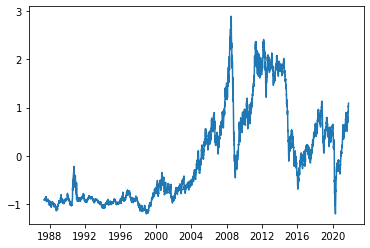

In [75]:
plt.plot(df.index[:train_size+w],train_data)


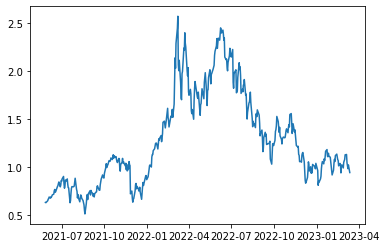

In [76]:
plt.plot(df.index[train_size:],test_data)


In [77]:
def create_dataset(dataset,time_step):
    dataX,dataY = [], []

    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])

    return np.array(dataX), np.array(dataY)

In [78]:
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

In [79]:
time_step = w
#Using 100 consecutive values predicting 101th value
#f1-------f100 = X
#f101 = y
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [80]:
X_train.shape,X_test.shape

((8636, 100), (355, 100))

In [81]:
#Making data 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [82]:
X_train.shape,X_test.shape

((8636, 100, 1), (355, 100, 1))

In [83]:
X_train

array([[[-0.91542714],
        [-0.92090208],
        [-0.91786045],
        ...,
        [-0.91086469],
        [-0.91633963],
        [-0.91694796]],

       [[-0.92090208],
        [-0.91786045],
        [-0.91633963],
        ...,
        [-0.91633963],
        [-0.91694796],
        [-0.91542714]],

       [[-0.91786045],
        [-0.91633963],
        [-0.91542714],
        ...,
        [-0.91694796],
        [-0.91542714],
        [-0.91633963]],

       ...,

       [[ 0.60417375],
        [ 0.61056119],
        [ 0.61451531],
        ...,
        [ 1.0172278 ],
        [ 1.06528563],
        [ 1.05859404]],

       [[ 0.61056119],
        [ 0.61451531],
        [ 0.62972349],
        ...,
        [ 1.06528563],
        [ 1.05859404],
        [ 1.05859404]],

       [[ 0.61451531],
        [ 0.62972349],
        [ 0.62759434],
        ...,
        [ 1.05859404],
        [ 1.05859404],
        [ 1.06863143]]])

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 

In [85]:
model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(w,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [86]:
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
68/68 [==============================] - 16s 229ms/step - loss: 0.0821 - val_loss: 0.0408
Epoch 2/10
68/68 [==============================] - 14s 207ms/step - loss: 0.0087 - val_loss: 0.0318
Epoch 3/10
68/68 [==============================] - 14s 201ms/step - loss: 0.0076 - val_loss: 0.0287
Epoch 4/10
68/68 [==============================] - 14s 210ms/step - loss: 0.0072 - val_loss: 0.0264
Epoch 5/10
68/68 [==============================] - 16s 234ms/step - loss: 0.0065 - val_loss: 0.0260
Epoch 6/10
68/68 [==============================] - 14s 206ms/step - loss: 0.0061 - val_loss: 0.0250
Epoch 7/10
68/68 [==============================] - 15s 217ms/step - loss: 0.0058 - val_loss: 0.0286
Epoch 8/10
68/68 [==============================] - 18s 258ms/step - loss: 0.0053 - val_loss: 0.0229
Epoch 9/10
68/68 [==============================] - 18s 264ms/step - loss: 0.0050 - val_loss: 0.0231
Epoch 10/10
68/68 [==============================] - 16s 231ms/step - loss: 0.0046 - val_lo

In [89]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [91]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [92]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.11468641102142

In [93]:
math.sqrt(mean_squared_error(y_test,test_predict))

94.23447908722457

In [94]:
train_predict.shape

(8636, 1)

In [95]:
test_predict.shape

(355, 1)

In [96]:
a = train_predict.reshape(train_predict.shape[0],)

In [97]:
a.shape

(8636,)

In [98]:
b = test_predict.reshape(test_predict.shape[0],)

In [99]:
b.shape 

(355,)

In [100]:
c = list(a)+list(b) # Total

In [101]:
len(c)

8991

In [102]:
df

,Price,Predicted Price
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,NaN
1987-05-25,18.60,NaN
1987-05-26,18.63,NaN
...,...,...
2023-03-07,83.03,35.312229
2023-03-08,82.10,35.312225
2023-03-09,81.00,35.312225


In [103]:
t = []
for i in range(100):
    t.append(np.NaN)

In [104]:
d = t+c

In [105]:
df['Predicted Price'] = d

In [106]:
df 

,Price,Predicted Price
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,NaN
1987-05-25,18.60,NaN
1987-05-26,18.63,NaN
...,...,...
2023-03-07,83.03,82.722961
2023-03-08,82.10,83.397781
2023-03-09,81.00,83.743622


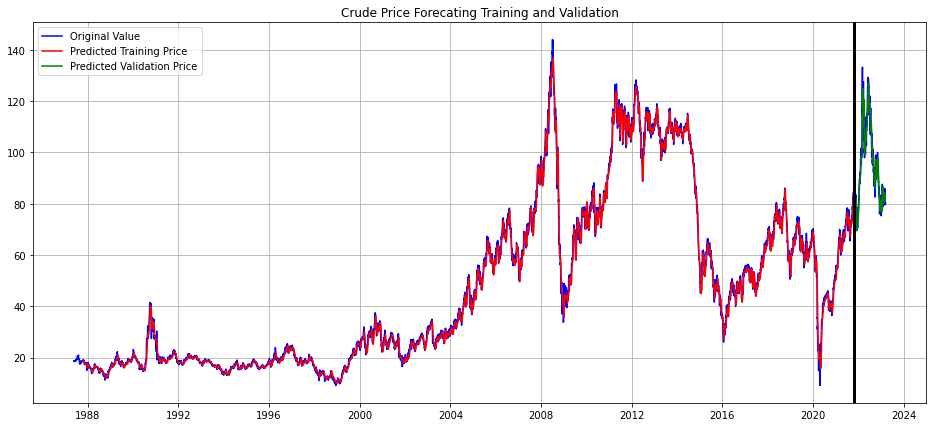

In [107]:
plt.figure(figsize=(16,7))
plt.grid(True)
plt.title("Crude Price Forecating Training and Validation")
plt.plot(df.index,df['Price'],label = "Original Value",c = "blue")
plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicted Training Price",c = "Red")
plt.plot(df[train_predict.shape[0]+w:].index,df['Predicted Price'][train_predict.shape[0]+w:],label = "Predicted Validation Price",c = "Green")
plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)

plt.legend()

## Forecasting in future

In [108]:
x_input = test_data[-100:].reshape(1,-1)

In [109]:
temp_input = list(x_input)


In [110]:
temp_input = temp_input[0].tolist()

In [111]:
lst_output = []
n_steps = 100
i = 0

while i < 30:
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:]) # Taking x_input values from 2nd value onward, so that total value will be 100
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1)) #making tensor of 1 batch, with n rows and 1 column
        #print(x_input)
        yhat = model.predict(x_input,verbose = 1)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist()) #Adding forecasted value to the temp_input, for further forecasting, now there are 102 values in temp_input
        temp_input = temp_input[1:] #Because after adding the above yhat[0], total number of elements in temp_input is 102, so we will select last 101 elements so that again if loop will go on running for 30 days
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:        #first loop will go inside this
        x_input = x_input.reshape((1,n_steps,1))  #last 100 days data, nsteps = 100 and reshaping it so that we can feed it in LSTM
        yhat = model.predict(x_input,verbose = 0) #Taking prediction from model 
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #Adding predicted value of 101 day in temp_input, so that this value can be used for forecasting values for days starting from day 102
        print(len(temp_input))
        lst_output.extend(yhat.tolist())  #Adding 101 day forecast to Output forecasting list 
        i = i+1

[1.0337702]
101
1 day input [1.31074559 1.3031415  1.3089206  1.34450774 1.38222401 1.3965197
 1.35576179 1.41111954 1.44001508 1.41629032 1.54525565 1.55559721
 1.46373983 1.3481577  1.38465732 1.44913998 1.36458253 1.38617814
 1.3347745  1.28580418 1.22284233 1.20793832 1.21432575 1.13068079
 1.12125172 1.05463991 1.05768155 1.04916497 1.12186005 1.142239
 1.15014725 1.05342326 0.94879101 0.86332106 0.83016724 0.84081296
 0.89039162 0.95548261 1.05251077 1.02239858 0.95730759 1.00171546
 0.93449532 0.95882841 0.93844945 1.02574438 1.00293211 0.98042401
 1.03699843 0.9621742  0.80857163 0.85176285 0.84202962 0.87518344
 0.90255816 0.98498647 1.03000267 1.0555524  1.03182765 1.08444793
 1.06619812 1.10573938 1.16292212 1.1805636  1.11091016 1.10573938
 1.14254317 1.11425596 1.10026444 1.05524824 1.00019464 0.96856164
 0.91624551 0.96582417 1.04004006 1.0780605  1.05646489 1.11729759
 1.1331141  1.10208942 1.07623552 1.06802311 1.01114453 1.03608594
 1.01631531 0.93753696 1.01449033 1.0

In [112]:
forecast = scaler.inverse_transform(lst_output)

In [113]:
forecast = forecast.reshape(30,)

In [114]:
ddf = df[100:]

In [115]:
t_fut = pd.date_range('2023-03-14 00:00:00+00:00',periods=30)

In [116]:
dffor = pd.DataFrame({'Forecast Price':forecast},index = t_fut)

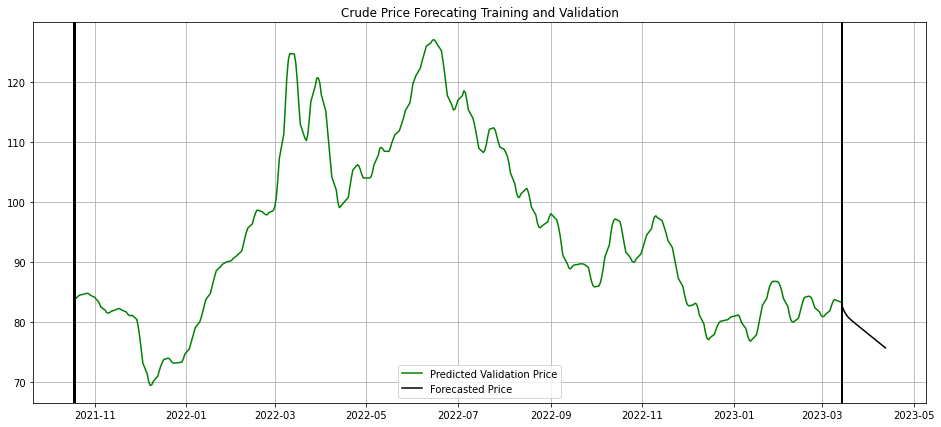

In [117]:
plt.figure(figsize=(16,7))
plt.grid(True)
plt.title("Crude Price Forecating Training and Validation")
#plt.plot(df.index,df['Price'],label = "Original Value",c = "blue")
#plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicted Training Price",c = "Red")
plt.plot(df[train_predict.shape[0]+w:].index,df['Predicted Price'][train_predict.shape[0]+w:],label = "Predicted Validation Price",c = "Green")

plt.plot(dffor.index,dffor['Forecast Price'],label = 'Forecasted Price',c = 'black')

plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)
plt.axvline(dffor.index[0],color = 'black',lw=2)

plt.legend()